<a href="https://colab.research.google.com/github/Ajjme/Random_Forest/blob/main/Forest_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sloct_data = pd.read_excel('/content/drive/MyDrive/Supplier Dictionary - Fall 2023.xlsx', skiprows = 3 )
sloct_data


,Unnamed: 0,Key,Supplier,Supplier Pretty,Unnamed: 4,Brand,SME,Headquarters,Continent,Season Started,...,CDP Base Year,Unnamed: 44,Unnamed: 45,SBTI Name,Near Term,Date,Approved,Company Temperature Alignment,Unnamed: 51,Verification Season
0,NaN,SL014184,autumn harp,Autumn Harp,NaN,The Clorox Company,Yes,United States,North America,Fall 2022,...,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023
1,NaN,SL046381,aak ab,AAK AB,NaN,MARS,No,Sweden,Europe,Spring 2022,...,2010.0,NaN,NaN,AAK AB,Committed,01/12/2020,NaN,NaN,NaN,Fall 2022
2,NaN,SL064951,aaron thomas company,Aaron Thomas Company,NaN,PepsiCo,No,United States,North America,Spring 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023
3,NaN,SL050402,ab rokiskio suris,Ab Rokiskio Suris,NaN,MARS,Yes,Lithuania,Europe,Fall 2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2023
4,NaN,SL003359,ab sugar (including british sugar and azucarera),Ab Sugar Including British Sugar And Azucarera,NaN,McCormick,No,United Kingdom,Asia,Spring 2022,...,NaN,NaN,NaN,AB Sugar,Committed,01/06/2022,NaN,NaN,NaN,Spring 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,NaN,SL036750,mile hi companies,Mile HI Companies,NaN,McDonalds,Yes,United States,North America,Fall 2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023
855,NaN,SL075784,kaap agri,Kaap Agri,NaN,PepsiCo,No,South Africa,Africa,Fall 2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023
856,NaN,SL031741,mccain foods,McCain Foods,NaN,McDonalds,No,Canada,North America,Fall 2023,...,NaN,NaN,NaN,McCain Foods Limited,Targets Set,01/05/2021,1.0,1.5°C,NaN,Fall 2023
857,NaN,SL059160,dongguan rilong feed,Dongguan Rilong Feed,NaN,PepsiCo,Yes,China,Asia,Fall 2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2023


In [ ]:
# iterating the columns
for col in sloct_data.columns:
    print(col)

    ### columns to add = emissions data, company size, Convert to the average value or One hot encode?, Zoom attendance, Language use
    ### try numeric first
    ### one hot encode product cat
    ### as if I need every entry to have an answer

Unnamed: 0
Key
Supplier
Supplier Pretty
Unnamed: 4
Brand
SME
Headquarters
Continent
Season Started
First Course
Start Year
Spring 2021 Enrollment
Fall 2021 Enrollment
Spring 2022 Enrollment
Fall 2022 Enrollment
Spring 2023 Enrollment
Fall 2023 Enrollment
Unnamed: 18
Fall 2021 Final Grades
Fall 2021 Assignment
Fall 2021 Webinar
Unnamed: 22
Spring 2022 Final Grades
Spring 2022 Assignment
Spring 2022 Webinar
Unnamed: 26
Fall 2022 Final Grades
Fall 2022 Assignment
Fall 2022 Webinar
Unnamed: 30
Spring 2023 Final Grades
Spring 2023 Assignment
Spring 2023 Webinar
Unnamed: 34
Unnamed: 35
GHG Scope 1 and 2 Footprint
GHG Scope 3 Footprint
SBTi Approved
Abatement Roadmap
CDP Disclosure
Unnamed: 41
CDP Link
CDP Base Year
Unnamed: 44
Unnamed: 45
SBTI Name
Near Term
Date
Approved
Company Temperature Alignment
Unnamed: 51
Verification Season


In [ ]:
simple_sloct = sloct_data[[ "Brand", "SME", "Continent", "Spring 2023 Final Grades"]] #"Key",
#include everything also look at webinar/zoom
# think about adding title of people

In [ ]:
#One hot encode
dummy_brand = pd.get_dummies(simple_sloct['Brand'])
simple_sloct = pd.merge(left = simple_sloct, right = dummy_brand, left_index = True, right_index = True)
simple_sloct = simple_sloct.drop(columns = ['Brand'])
#simple_sloct.head(10)

In [ ]:
#One hot encode
dummy_continent = pd.get_dummies(simple_sloct['Continent'])
simple_sloct = pd.merge(left = simple_sloct, right = dummy_continent, left_index = True, right_index = True)
simple_sloct = simple_sloct.drop(columns = ['Continent'])
simple_sloct.head(10)

,SME,Spring 2023 Final Grades,Atlantic Packaging Corporation,DS Smith,Disney,General Mills,Heineken,Keurig Dr Pepper (KDP),MARS,MHI,...,The Coca-Cola Company,The Estee Lauder Companies,Yum! Brands,,Africa,Asia,Australia,Europe,North America,South America
0,Yes,On Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,No,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,No,On Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Yes,Off Track,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,No,Unengaged,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Yes,Off Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,No,Off Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,No,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,Yes,On Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,No,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
 simple_sloct["SME"] = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              simple_sloct.SME.values.tolist()), simple_sloct.index)
#simple_sloct.head(10)

In [ ]:
simple_sloct.head()

,SME,Spring 2023 Final Grades,Atlantic Packaging Corporation,DS Smith,Disney,General Mills,Heineken,Keurig Dr Pepper (KDP),MARS,MHI,...,The Coca-Cola Company,The Estee Lauder Companies,Yum! Brands,,Africa,Asia,Australia,Europe,North America,South America
0,1,On Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,On Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,Off Track,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,Off Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,Off Track,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
simple_sloct = simple_sloct.dropna()

#filter = simple_sloct['Spring 2023 Final Grades'].str.contains("Unengaged")
#case_when ----
simple_sloct["Spring 2023 Final Grades"] = simple_sloct["Spring 2023 Final Grades"].apply(lambda x: 'Off Track' if x == 'Unengaged' else x)
### How do I do a case_when Statement here???----------------
#could also do to numbers use the if else logic in the apply

#simple_sloct = simple_sloct[~filter]
simple_sloct["Spring 2023 Final Grades"].unique()

#bring down to just two classes

<ipython-input-10-2161b518a11f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_sloct["Spring 2023 Final Grades"] = simple_sloct["Spring 2023 Final Grades"].apply(lambda x: 'Off Track' if x == 'Unengaged' else x)


array(['On Track', 'Off Track'], dtype=object)

In [ ]:
#Radomly Shuffle both dataframes to get rid of any pre-existing organization
simple_sloct =simple_sloct.sample(frac=1).reset_index(drop=True)

Decision tree

In [ ]:
#import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [ ]:
features = simple_sloct.drop(columns = ['Spring 2023 Final Grades'])
target = simple_sloct['Spring 2023 Final Grades']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 8)

In [ ]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions: ', X_test.shape)
print('y_test dimensions: ', y_test.shape)

X_train dimensions:  (238, 29)
y_train dimensions:  (238,)
X_test dimensions:  (60, 29)
y_test dimensions:  (60,)


In [ ]:
scaler = MinMaxScaler()
#Normalize the train and test independently after splitting the two
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(y_train)

180     On Track
166    Off Track
246     On Track
34      On Track
176    Off Track
         ...    
85     Off Track
48     Off Track
191    Off Track
136    Off Track
133    Off Track
Name: Spring 2023 Final Grades, Length: 238, dtype: object


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#also try the random forest

In [ ]:
#best_features = SelectKBest(f_classif, k=8)
#X_kbest = best_features.fit_transform(X_train_scaled, y_train)
#X_test_kbest = best_features.fit_transform(X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1  3  8 10 15 16 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1  3  8 10 15 16 21 22 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
#X_kbest
#this is a numpy array but want to have a df with the column names
# with the DF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dt = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
#play with the max depth feature
#dt = DecisionTreeClassifier().fit(X_kbest, y_train) #look into max depth deeper risks overfit
#can train on multiple max depths and plot the values of performance
cv = cross_val_score(dt, X_train, y_train, cv =5)
print(cv)
print(cv.mean())
#shows the accuracy of splits

[0.5        0.5        0.625      0.57446809 0.59574468]
0.5590425531914893


In [ ]:
# similar to select k best
# columns I think are important
# this picks the columns we like
X_train_selected = X_train[[ "SME", "Continent",]]

In [ ]:
y_pred = dt.predict(X_test)
# giving it the test data and this is using it
#Mess with max depth - currently this is over fit
#

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[14 19]
 [ 7 20]]


[[14 19]
 [ 7 20]]


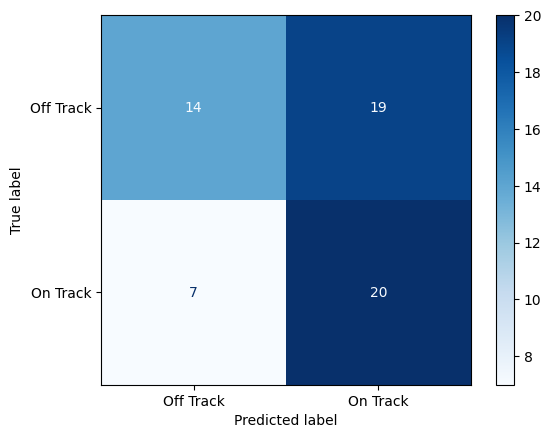

In [ ]:
import matplotlib.pyplot as plt
#X_test_kbest
disp = ConfusionMatrixDisplay.from_estimator( dt, X_test, y_test, cmap=plt.cm.Blues, )
print(disp.confusion_matrix)

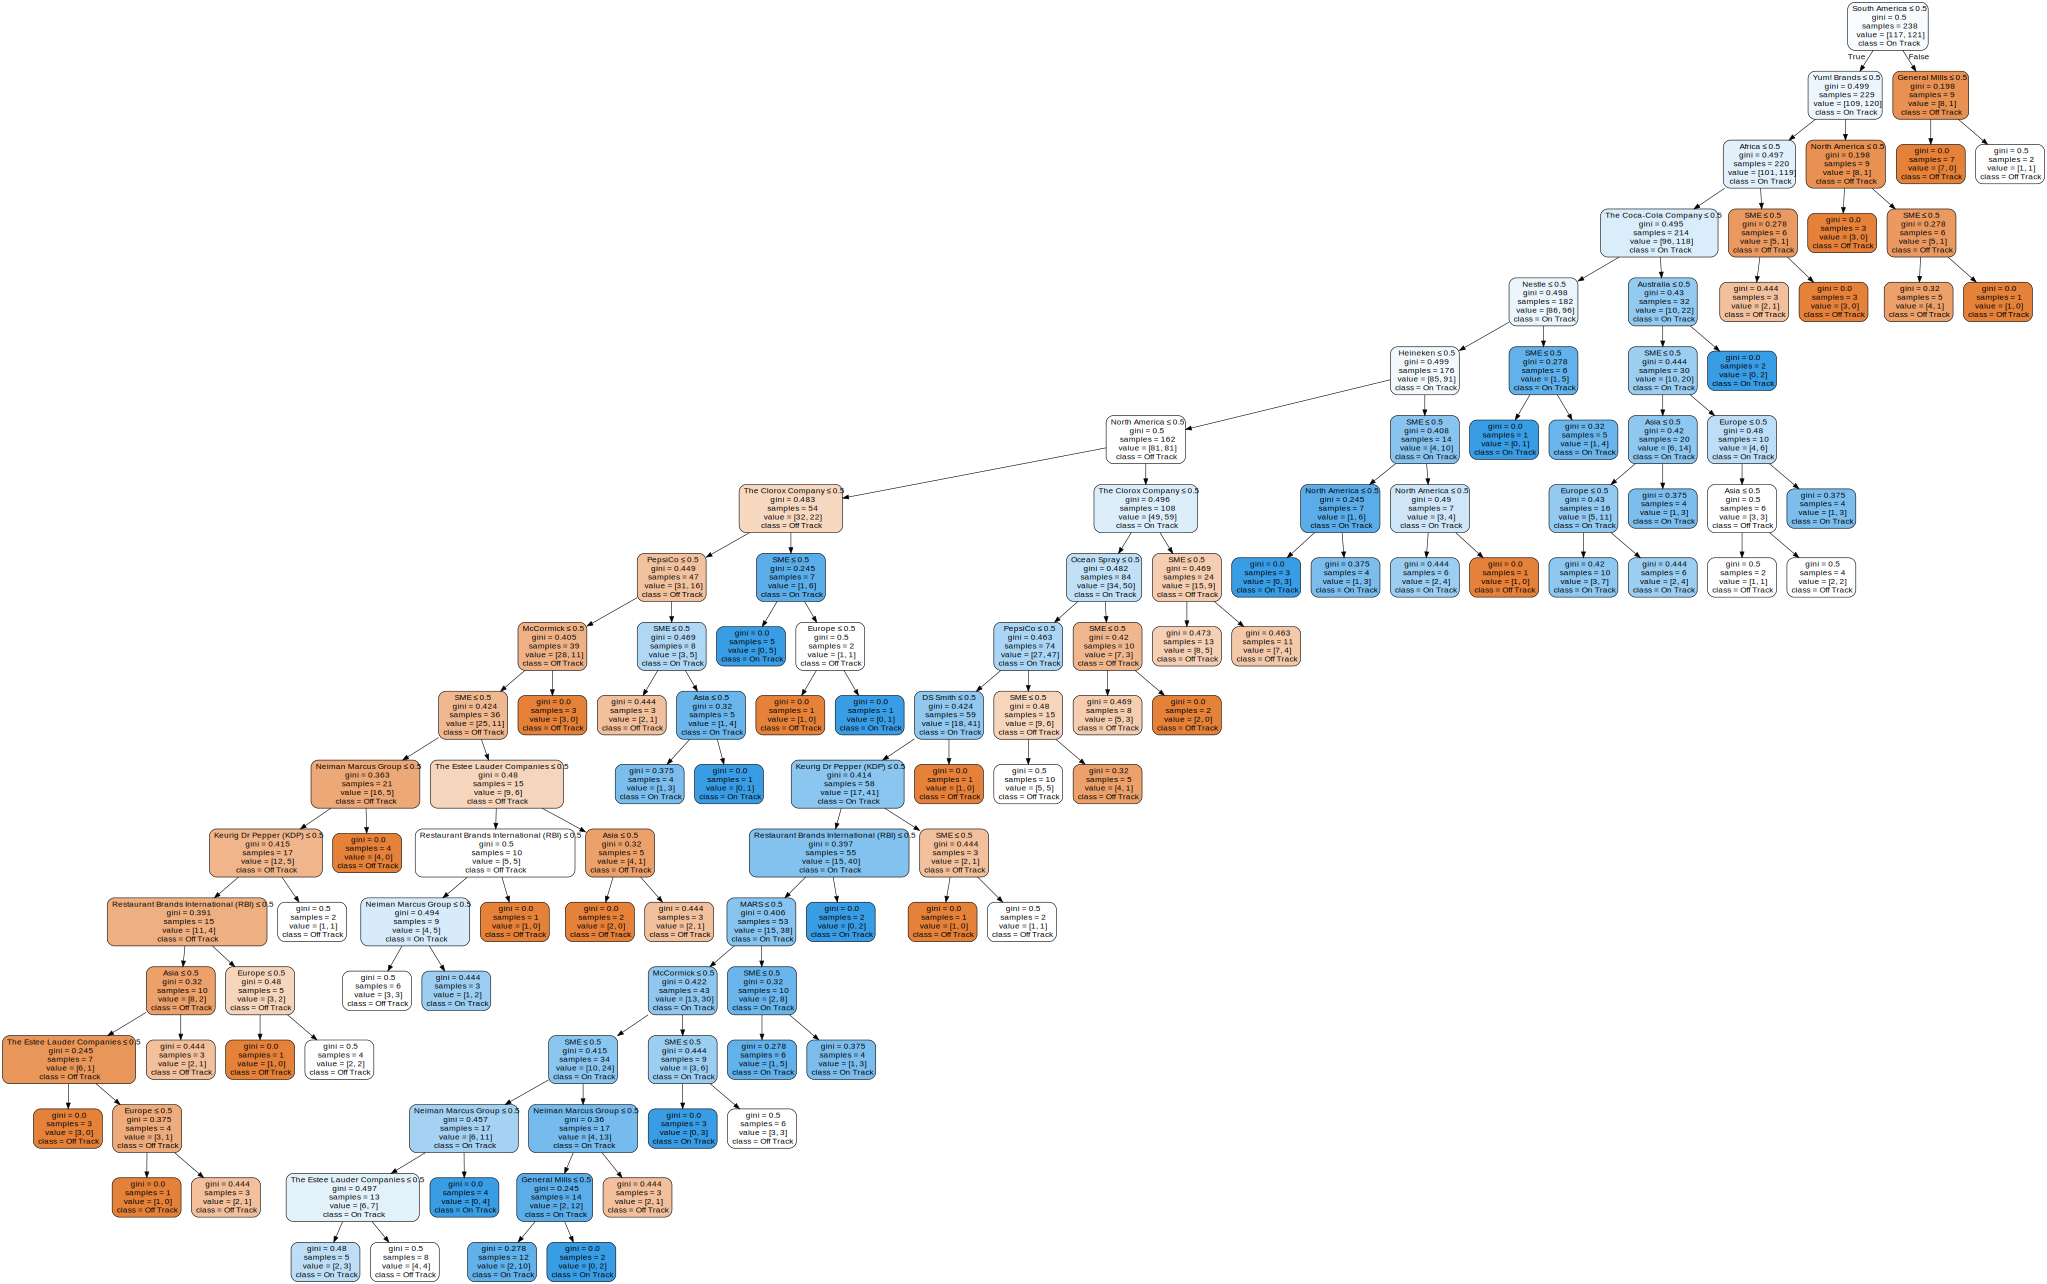

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#X_train.columns
graphic = export_graphviz(dt, out_file=None, feature_names = X_train.columns, class_names=['Off Track','On Track'], filled=True, rounded=True, special_characters=True)

# Render the GraphViz object as an image
graph = graphviz.Source(graphic)
display(graph)

#or Select k Best to see what columns are the best k = 1 would be most important